## GRIP: The Sparks Foundation
#### Utkarsh Kumawat
### Task #6

# Iris Flower Classification 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df = df.drop(['Id'],axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Plots

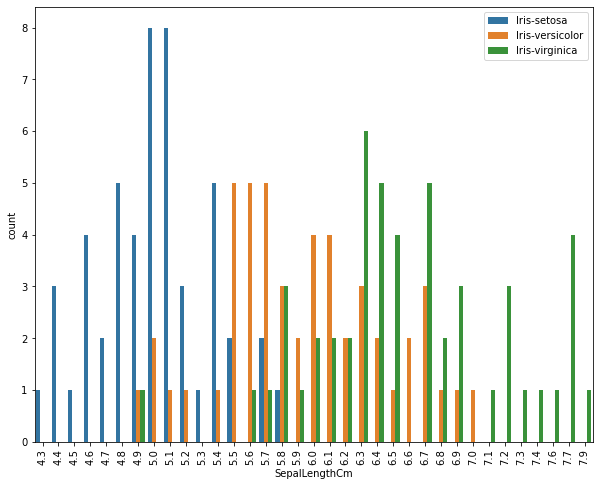

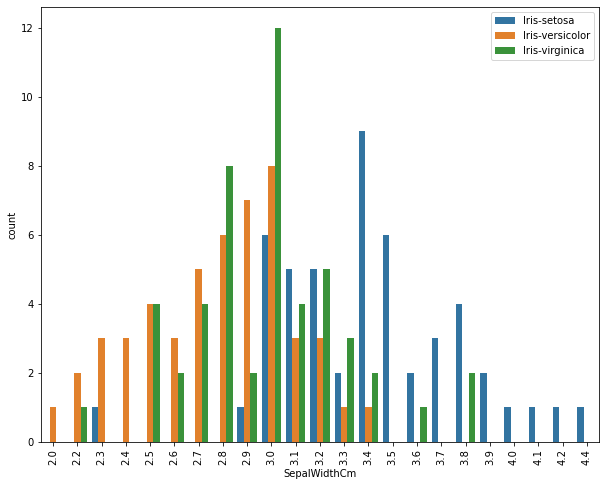

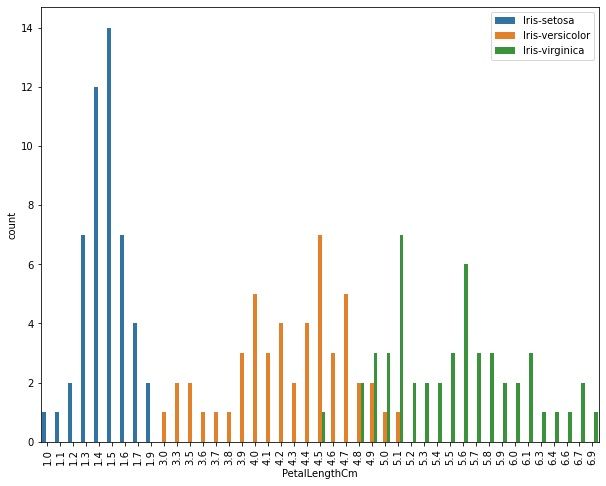

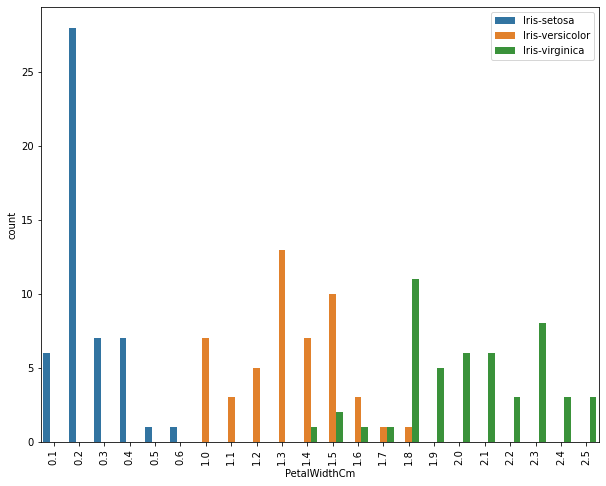

In [8]:
for col in df.columns[:-1].tolist():
    plt.figure(figsize=(10,8))
    sns.countplot(x=col,hue='Species',data=df)
    plt.xticks(rotation=90)
    plt.legend(loc = 1)
    plt.show()

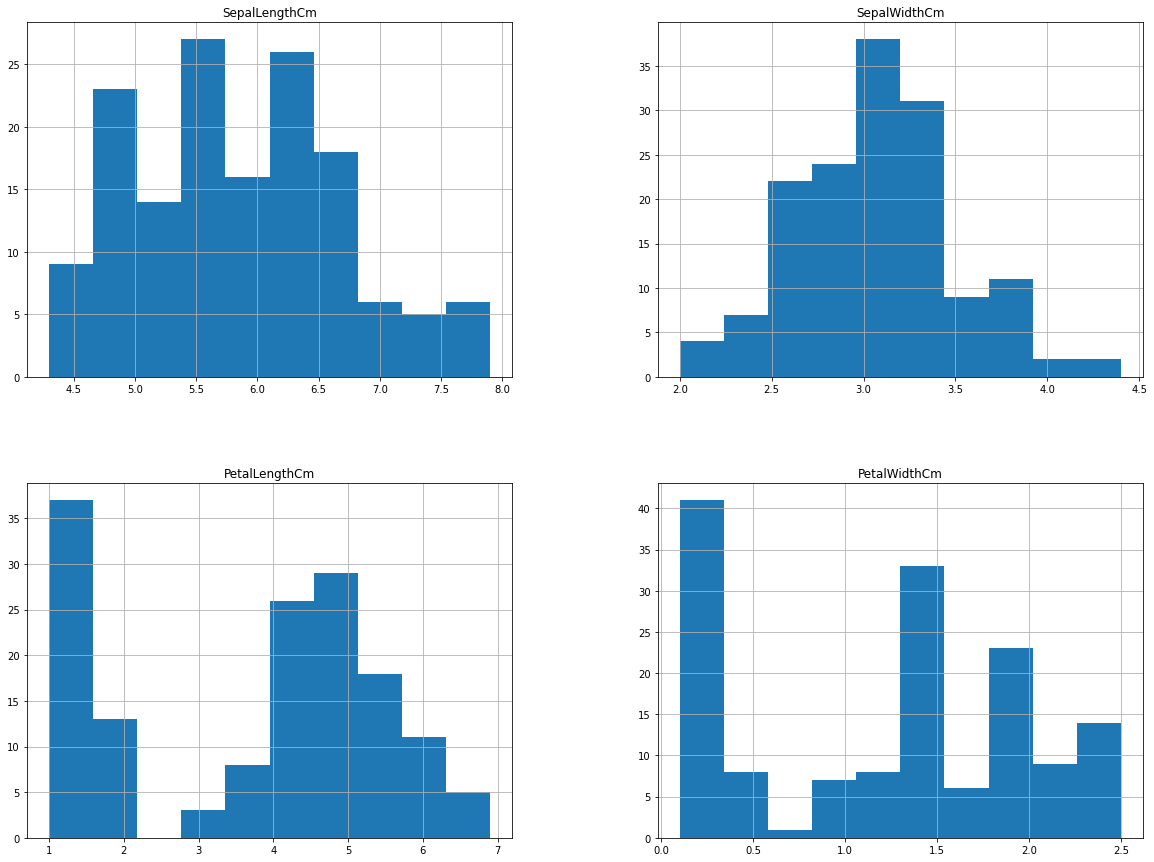

In [9]:
df.hist(figsize=(20,15));

In [10]:
species = {
    "Iris-setosa" : 0,
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2,
}

df["class_value"] = df["Species"].map(species)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class_value
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


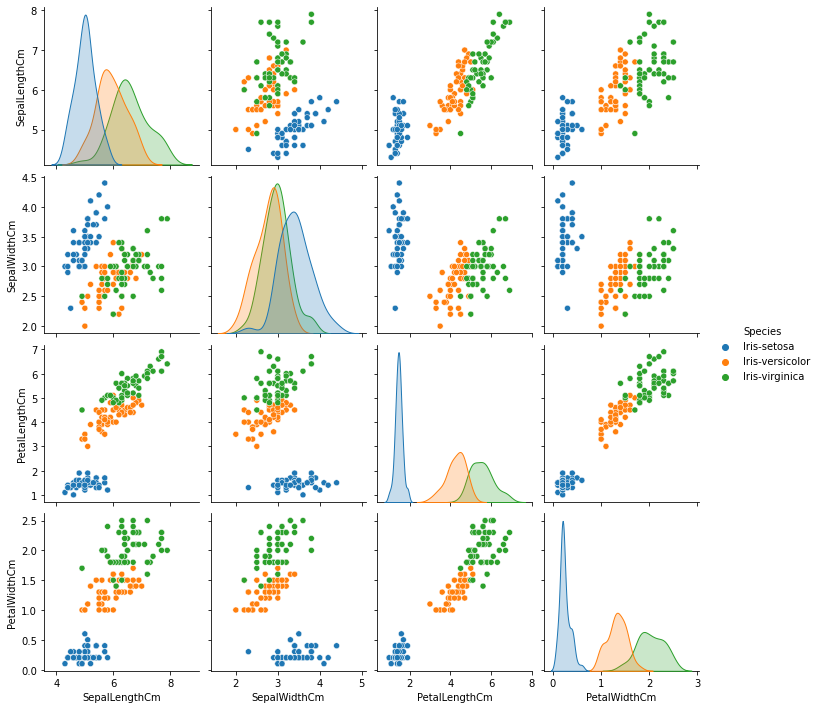

In [11]:
sns.pairplot(df.iloc[:,:-1], hue="Species");

# Correlation Matrix

In [12]:
corr = df.corr()

<AxesSubplot:>

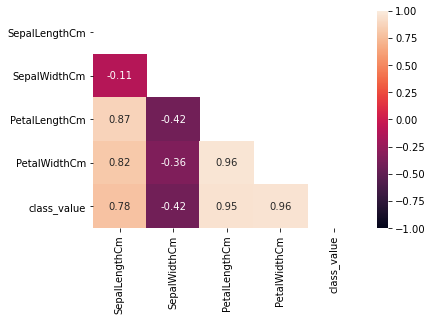

In [13]:
sns.heatmap(corr,mask = np.triu(np.ones_like(corr, dtype=bool)),annot=True,vmax = 1,vmin = -1)

# Spliting of Data Set

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [15]:
X = df.iloc[:,:-2]
y = df.iloc[:,-1]

In [16]:
print("Shape of features:",X.shape)
print("Shape of output:",y.shape)

Shape of features: (150, 4)
Shape of output: (150,)


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [18]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [19]:
print(X_val.shape)
print(y_val.shape)

(30, 4)
(30,)


# Decision Tree Classifier

In [20]:
model = DecisionTreeClassifier()

In [21]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
text = tree.export_text(model)
print(text)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [23]:
features = df.columns.tolist()[:-2]
target = df.Species.unique()

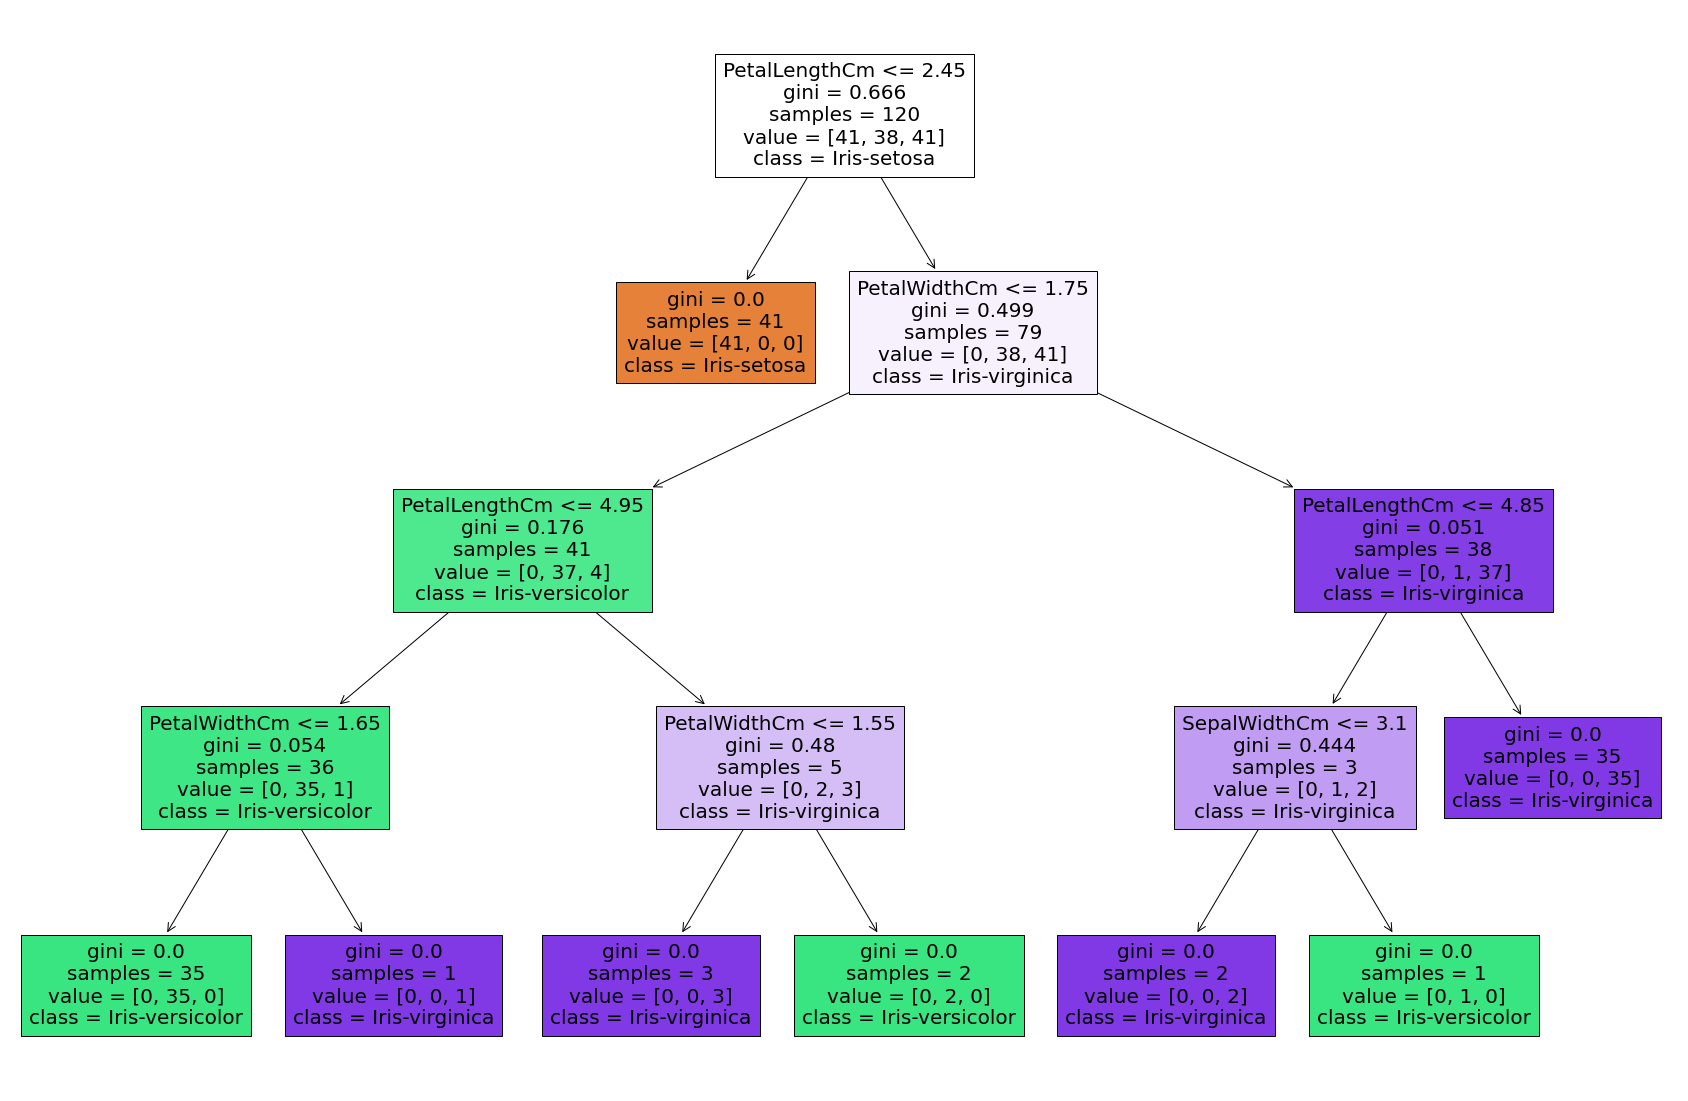

In [24]:
fig = plt.figure(figsize=(30,20))
plot = tree.plot_tree(model, feature_names=features, class_names=target, filled=True)

In [25]:
fig.savefig("Decision_Tree.png")

In [26]:
y_pred = model.predict(X_val)

In [27]:
pd.DataFrame({'Actual':y_val, 'Predicted':y_pred})

,Actual,Predicted
99,1,1
91,1,1
22,0,0
105,2,2
137,2,2
125,2,2
80,1,1
16,0,0
55,1,1
30,0,0


# Accuracy

In [28]:
model.score(X_val,y_val)

0.9666666666666667

# Confusion Matrix

In [29]:
conf_mat = confusion_matrix(y_val,y_pred)

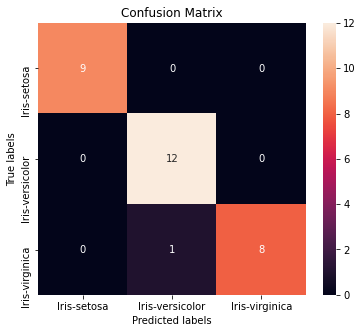

In [30]:
plt.figure(figsize=(6,5))
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica']); ax.yaxis.set_ticklabels(['Iris-setosa','Iris-versicolor','Iris-virginica']);